# Transformations

1. Translation
2. Rotation
3. Scaling
4. Projective

In [2]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [7]:
def draw_quadrangle(X, Y, color = 'b', limX = [-50, 50], limY = [-50, 50]):
    '''
    To draw the object
    (X, Y) are the x-axis coordinates and y-axis coordinates of the picture's pixels
    limX = [lowerbound, upperbound]: the limitation of x axis
    limY = [lowerbound, upperbound]: the limitation of y axis
    '''
    plt.scatter(X,Y, color = color)
    plt.xlim(limX)
    plt.ylim(limY)

In [4]:
def transform(X, Y, T = np.eye(3), p = False):
    '''
    The transformation demonstration
    Input:
    - (X, Y) are the positions of pixels in the image need to be transformed
    - T is the transformation matrix
    - p = False is the demonstration mode, otherwise the pixel mode
    Attention: pixels' positions are positive integers only.
    Lecturers can select pixel mode to illsutrate the effect of pixels' position

    Output:
    homogeneous_coordinates: created from inhomogeneous coordinates
    (new_X, new_Y) are the transformed coordinates
    '''
    row_ones = np.ones(len(X))
    homogeneous_coordinates = np.concatenate(([X], [Y], [row_ones]), axis = 0)
    new_coordinates = T @ homogeneous_coordinates
    new_X = new_coordinates[0, :]/new_coordinates[2, :]
    new_Y = new_coordinates[1, :]/new_coordinates[2, :]
    if(p):
        return new_X.astype('int32'), new_Y.astype('int32')
    else:
        return new_X, new_Y



## Initial picture

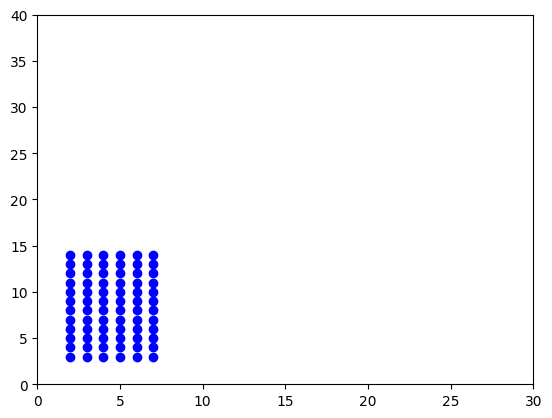

In [8]:
f1, f2 = np.meshgrid(np.arange(2,8), np.arange(3,15))
# print(f1, f2)
X = f1.flatten()
Y = f2.flatten()
draw_quadrangle(X, Y, limX = [0, 30], limY = [0, 40])

## 1. Translation transformation

In [5]:
T = np.array([[1, 0, 15],
              [0, 1, 20],
              [0, 0, 1]])
newX, newY = transform(X, Y, T, p = False)

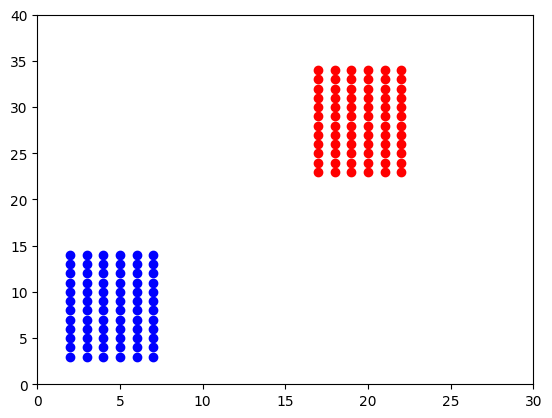

In [17]:
draw_quadrangle(X, Y, 'b')
draw_quadrangle(newX, newY, 'r', [0, 30], [0, 40])

## 2. Rotation transformation




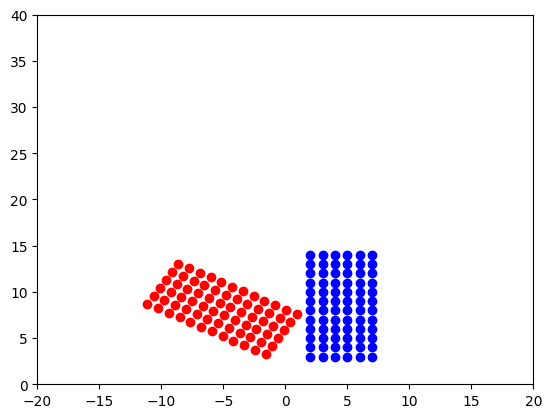

In [18]:
'''
Lecturers can change different theta_deg to see the results
'''
theta_deg = 60 # in degree
theta = theta_deg * np.pi / 180 # in radian
# print(np.sin(theta))
T = np.array([[np.cos(theta), -np.sin(theta), 0], [np.sin(theta), np.cos(theta), 0], [0, 0, 1]])
newX, newY = transform(X, Y, T, p = False)
draw_quadrangle(X, Y, 'b')
draw_quadrangle(newX, newY, 'r', [-20, 20], [0, 40])

## 3. Scaling transformation

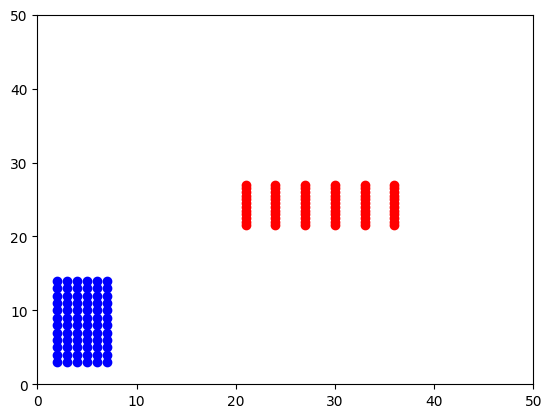

In [19]:
# scale x: 3; scale y: 0.5, translate  x: 15; translate y: 20
T = np.array([[3, 0, 15],
              [0, 0.5, 20],
              [0, 0, 1]])
newX, newY = transform(X, Y, T, p = False)
draw_quadrangle(X, Y, 'b')
draw_quadrangle(newX, newY, 'r', [0, 50], [0, 50])

## 4. Projective transformation

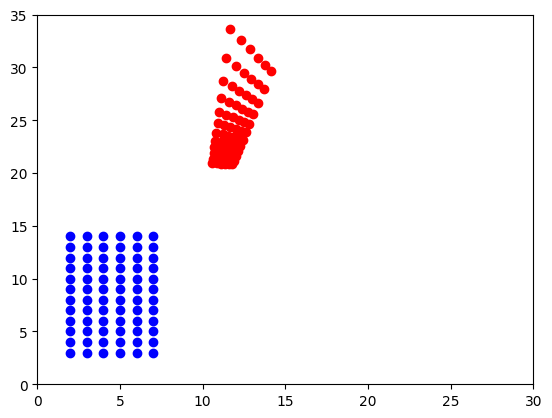

In [20]:
T = np.array([[5, 5, 10],
              [5, 7, 70],
              [0.25, 0.5, 1]])
newX, newY = transform(X, Y, T, p = False)
# print(newX)
# print(newY)
draw_quadrangle(X, Y, 'b')
draw_quadrangle(newX, newY, 'r', [0, 30], [0, 35])

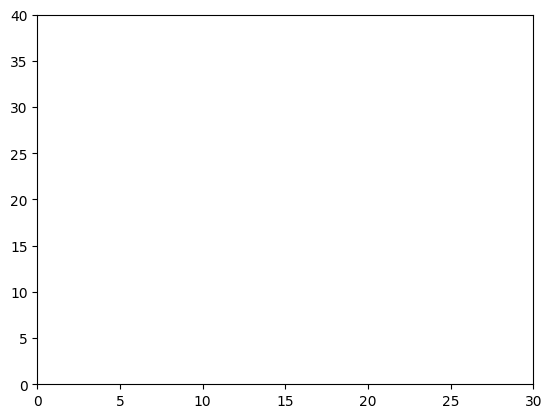

In [15]:
#Reflection
T = np.array([
        [-1, 0, 0],
        [0, 1, 0],
        [0, 0, 1]
    ])

newX, newY = transform(X, Y, T, p = False)
# draw_quadrangle(X, Y, 'b')
draw_quadrangle(newX, newY, 'r', [0, 30], [0, 40])

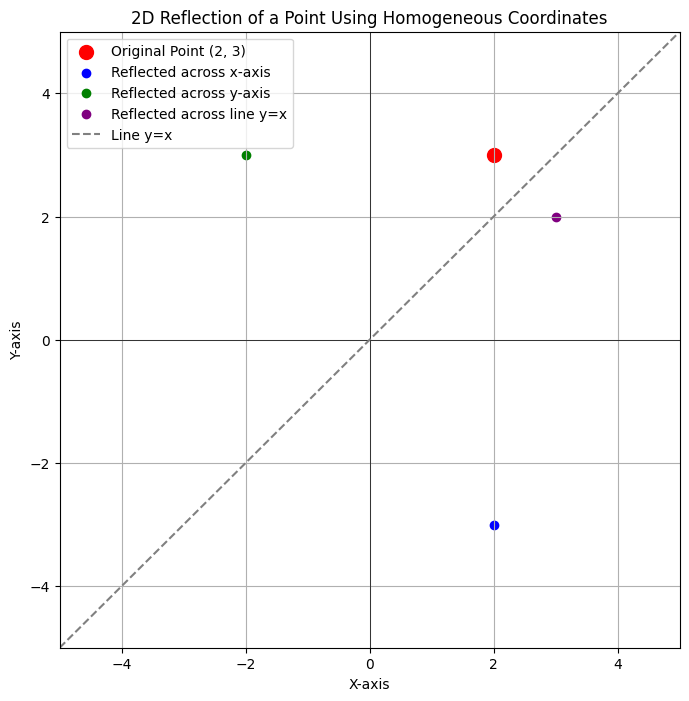

In [20]:
import numpy as np
import matplotlib.pyplot as plt

def reflect_point_homogeneous(point, reflection_matrix):
    """Reflect a point using a reflection matrix in homogeneous coordinates.
    
    Args:
        point (tuple): The (x, y) coordinates of the point to reflect.
        reflection_matrix (numpy.ndarray): The 3x3 reflection matrix in homogeneous coordinates.
    
    Returns:
        numpy.ndarray: The coordinates of the reflected point in Cartesian coordinates.
    """
    # Convert point to homogeneous coordinates
    point_homogeneous = np.array([*point, 1])
    # Apply the reflection matrix
    reflected_point_homogeneous = reflection_matrix @ point_homogeneous
    # Convert back to Cartesian coordinates
    return reflected_point_homogeneous[:2]

# Define the original point
original_point = np.array([2, 3])

# Define reflection matrices in homogeneous coordinates
reflection_matrices = {
    'x-axis': np.array([
        [1, 0, 0],
        [0, -1, 0],
        [0, 0, 1]
    ]),
    'y-axis': np.array([
        [-1, 0, 0],
        [0, 1, 0],
        [0, 0, 1]
    ]),
    'line y=x': np.array([
        [0, 1, 0],
        [1, 0, 0],
        [0, 0, 1]
    ])
}

# Perform reflections
reflected_points = {plane: reflect_point_homogeneous(original_point, matrix) for plane, matrix in reflection_matrices.items()}

# Plotting
fig, ax = plt.subplots(figsize=(8, 8))

# Plot original point
ax.scatter(*original_point, color='red', label='Original Point (2, 3)', s=100)

# Plot reflected points
colors = {'x-axis': 'blue', 'y-axis': 'green', 'line y=x': 'purple'}
for plane, point in reflected_points.items():
    ax.scatter(*point, color=colors[plane], label=f'Reflected across {plane}')

# Plot settings
ax.axhline(0, color='black', linewidth=0.5)
ax.axvline(0, color='black', linewidth=0.5)
ax.grid(True)

# Draw reflection lines
# Line y=x
x_vals = np.linspace(-5, 5, 400)
ax.plot(x_vals, x_vals, color='gray', linestyle='--', label='Line y=x')

# Set limits, labels, and legend
ax.set_xlim(-5, 5)
ax.set_ylim(-5, 5)
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.legend()
ax.set_title('2D Reflection of a Point Using Homogeneous Coordinates')

plt.show()


In [35]:
for plane, point in reflected_points.items():
    print(plane)

x-axis
y-axis
line y=x
